<center> <img src='https://d2cdo4blch85n8.cloudfront.net/wp-content/uploads/2020/08/What-Is-the-Best-Way-to-Apply-for-a-Personal-Loan-Featured-image-1568x882.jpg' width=70%>

## Aim
* Build a predictor to identify whether or not the loan application of a person will be approved.
* Perform Data Analysis and Feature Engineering.
* Build Logistic Regression, Decision Tree Classifier and Random Forest Classifier.
* Train the machine learning models.
* Evaluate the models using variety of performance metrics.
* Compare the model performance.
* Understand and implement Stratified K Fold Cross Validation.
* Hyperpatameter Tuning with GridSearchCV
* Find out which feature in the loan application plays an important role to predict the approval status.



## Dataset
* Download this [dataset](https://drive.google.com/file/d/1YNwoDPacvmqyyvWPW3vCFSL6zQ7I1uMz/view?usp=sharing) and upload it to your `MyDrive`.
* Mount your google drive to colab notebook to access this dataset.

In [62]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Diving into the dataset

In [2]:
# Load the dataset from drive
loan_data_path = 'loan_status_approval.csv'
loan_df = pd.read_csv(loan_data_path)

In [3]:
# Visualise 5 random samples from the data
loan_df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
319,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
367,LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
447,LP002435,Male,Yes,0,Graduate,NaN,3539,1376.0,55.0,360.0,1.0,Rural,N
297,LP001954,Female,Yes,1,Graduate,No,4666,0.0,135.0,360.0,1.0,Urban,Y
302,LP001974,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
265,LP001875,Male,No,0,Graduate,No,4095,3447.0,151.0,360.0,1.0,Rural,Y
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
446,LP002434,Male,Yes,2,Not Graduate,No,4652,0.0,110.0,360.0,1.0,Rural,Y
148,LP001519,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N


In [66]:
# Get the shape of the dataframe
loan_df.shape

(614, 13)

In [67]:
# Get generic info of the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observations:-**
- There are missing values in some features.
- `Loan_ID` feature can be dropped.
- `Dependents` feature has numerical data yet is of `object` type.
- `Loan_Status` is the target that our models need to predict!

## Check for Duplicates and Missing Values


In [68]:
# Checking for duplicate entries
loan_df.duplicated().sum()

0

In [69]:
# Percentage of missing values
(loan_df.isnull().sum()/loan_df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**Observations:-**      
- `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount` and `Loan_Amount_Term` ≲ 5% missing values.
- `Credit_History` has about 10% of values missing.

## Handling the missing values
- We can simply drop the missing values with less than or about 5 percent of missing data as the number is less.
- We shall then perform some analysis on `Credit_History` and then see how can we handle missing values there.

In [70]:
# Dropping the null values
loan_df.dropna(subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
                       'Loan_Amount_Term'], inplace=True)

In [71]:
# Recheck the missing values
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
print(f'Total {614-loan_df.shape[0]} entries are dropped')

Total 91 entries are dropped


**Observations:-**
- So we have 43 entries missing for `Credit_History`.
- Let's perform some analysis on it as 91 entries have been dropped already, we don't want to loose more data.

In [73]:
# Get the unique values of credit history
loan_df['Credit_History'].unique()

array([ 1.,  0., nan])

- It is a categorical feature!


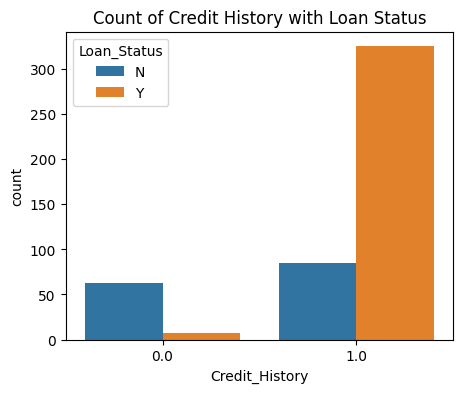

In [74]:
plt.figure(figsize=(5,4))
sns.countplot(data = loan_df, x = 'Credit_History', hue = 'Loan_Status')
plt.title('Count of Credit History with Loan Status')
plt.show()

**Observations:-**
- `Credit_History` of `1.0` has good `Loan_Status` approval.
- `Credit_History` of `0.0` has poor `Loan_Status` approaval.
- This means that `1.0` is representing a good credit histoy and `0.0` as bad credit history.
- Here, the missing values may indicate that the person has no previous history of loan.
- So this not available data can be considered as a category called `No_Credit_History`.
- Let's replace for now all missing values of `Credit_History` as `No_Credit_History`.
- This will help us understand if the cateogry is ordinal or not.

In [75]:
# Replacing NaN values of Credit_History
loan_df['Credit_History'].replace({np.nan:'No_Credit_History'}, inplace=True)

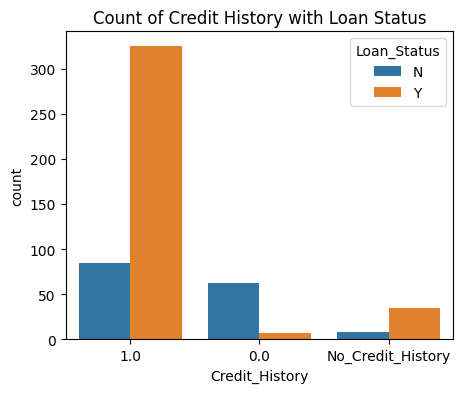

In [76]:
# Replot the countplot
plt.figure(figsize=(5,4))
sns.countplot(data = loan_df, x = 'Credit_History', hue = 'Loan_Status')
plt.title('Count of Credit History with Loan Status')
plt.show()

**Observations:-**
- Better chances of loan approval with no credit history as compared to bad credit history.
- Overall, we can see this pattern of loan approval status `Bad History` < `No Credit History` < `Good History`.
- Hence, `Credit_History` has ordinal categories.


In [77]:
# Performing Ordinal Encoding on Credit_History
loan_df['Credit_History'].replace({0.0 : 0,
                                'No_Credit_History' : 1,
                                1.0 : 2},inplace=True)

In [78]:
# Recheck missing values
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Engineering

* From the analysis, we had seen that `Dependents` column had numerical values but was of `Object` data type.

In [79]:
# Dependents feature values
loan_df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

**Observations:-**
- This is also a categorical feature showing if the applicant has no, one, two or more than 3 dependents.
- We can simply convert 3+ to some value more than 3, for example 4.


In [80]:
# Dependents Feature Replacement
loan_df['Dependents'].replace({'0' : 0,
                               '1' : 1,
                               '2' : 2,
                               '3+': 4}, inplace=True)

In [81]:
# dependent values
loan_df['Dependents'].value_counts()

0    299
2     91
1     90
4     43
Name: Dependents, dtype: int64

## Converting other categorical features to numeric

In [82]:
# Check for object dtype features
loan_df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        523 non-null    object
 1   Gender         523 non-null    object
 2   Married        523 non-null    object
 3   Education      523 non-null    object
 4   Self_Employed  523 non-null    object
 5   Property_Area  523 non-null    object
 6   Loan_Status    523 non-null    object
dtypes: object(7)
memory usage: 32.7+ KB


In [83]:
# Convert categorical features to numeric
loan_df.replace({'Married':{'No':0,'Yes':1},                                 # Nominal
                 'Gender':{'Male':1,'Female':0},                             # Nominal
                 'Self_Employed':{'No':0,'Yes':1},                           # Ordinal
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},        # Ordinal
                 'Education':{'Not Graduate':0, 'Graduate':1},               # Ordinal
                 'Loan_Status':{'N':0, 'Y':1}}, inplace=True)                # Target Nominal

In [84]:
loan_df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
573,LP002862,1,1,2,0,0,6125,1625.0,187.0,480.0,2.0,1,0
453,LP002449,1,1,0,1,0,2483,2466.0,90.0,180.0,0.0,0,1
77,LP001259,1,1,1,1,1,1000,3022.0,110.0,360.0,2.0,2,0
342,LP002119,1,1,1,0,0,4554,1229.0,158.0,360.0,2.0,2,1
129,LP001465,1,1,0,1,0,6080,2569.0,182.0,360.0,1.0,0,0


## Check for imbalnce

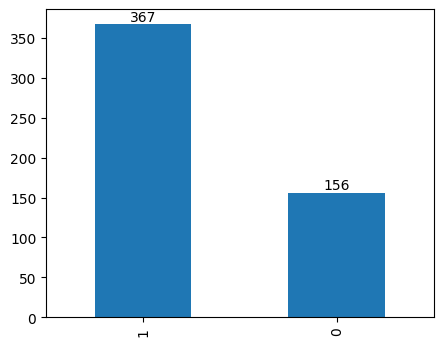

In [85]:
plt.figure(figsize=(5,4))
ax = loan_df['Loan_Status'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

**Observations:-**
- The data is imbalanced!
- Hence, we need to use f1 score as our main evaluation metric.

## Preparing the data for training, evaluation and testing

In [86]:
X_test = loan_df.iloc[-2:, 1:-1]
y_test = loan_df.iloc[-2:, -1]

In [87]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
612,1,1,2,1,0,7583,0.0,187.0,360.0,2.0,2
613,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1


In [88]:
y_test

612    1
613    0
Name: Loan_Status, dtype: int64

In [89]:
# Drop the test samples from loan df
loan_df.drop(loan_df.index[-2:], inplace=True)

In [90]:
# Check the new shape of data frame
loan_df.shape

(521, 13)

In [91]:
# For training and validation we shall use train test split
X = loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_df['Loan_Status']

In [92]:
# Stratify preserves the class distribution
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [93]:
print("Original class distribution:")
print("Class 0:", sum(Y == 0), "Class 1:", sum(Y == 1), "Ratio (Class 0 to 1):", sum(Y == 0)/sum(Y == 1))
print()
print("Training set class distribution:")
print("Class 0:", sum(y_train == 0), "Class 1:", sum(y_train == 1), "Ratio (Class 0 to 1):", sum(y_train==0)/sum(y_train==1))
print()
print("Testing set class distribution:")
print("Class 0:", sum(y_val == 0), "Class 1:", sum(y_val == 1), "Ratio (Class 0 to 1):", sum(y_val==0)/sum(y_val==1))

Original class distribution:
Class 0: 155 Class 1: 366 Ratio (Class 0 to 1): 0.42349726775956287

Training set class distribution:
Class 0: 139 Class 1: 329 Ratio (Class 0 to 1): 0.42249240121580545

Testing set class distribution:
Class 0: 16 Class 1: 37 Ratio (Class 0 to 1): 0.43243243243243246


In [94]:
print(X_train.shape, X_val.shape)

(468, 11) (53, 11)


## Feature Scaling
- Logistic Regression is feature scale sensitive.
- Decision Tree and hence Random Forest are not.
- Thus, we need to see if our data needs scaling.

In [95]:
# Scaling is done only on numeric features
numeric_features = loan_df.columns[6:10].to_list()
numeric_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [96]:
# Get the stats to see the distribution of numeric features
X_train[numeric_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,468.000000,468.000000,468.000000,468.000000
mean,5263.668803,1635.160085,146.470085,342.000000
std,4603.037945,2673.860521,84.541142,65.897721
min,150.000000,0.000000,9.000000,12.000000
25%,2897.250000,0.000000,100.000000,360.000000
50%,3854.000000,1128.500000,128.000000,360.000000
75%,5966.250000,2364.250000,173.000000,360.000000
max,39999.000000,33837.000000,650.000000,480.000000


- Let's standardize all these numerical features.

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20220809184957/StandardizationFormula2-300x169.png' width = 45%> <img src='https://365datascience.com/resources/blog/2018-11-standardization-min.jpg' width = 50%>

In [97]:
# sklearn offers StandardScaler to get this done
from sklearn.preprocessing import StandardScaler

# Create the scaler object
sc = StandardScaler()

In [98]:
# Create a copy of original X_train and X_val data that will be used for scaling
X_train_sc = X_train.copy()
X_val_sc = X_val.copy()

# fit helps to get mean and std of each numeric feature which is then standardize with transform
X_train_sc[numeric_features]= sc.fit_transform(X_train_sc[numeric_features])

# Once we have our mean and std from training, we don't need it for our val/test data so we simply use transform
X_val_sc[numeric_features]= sc.transform(X_val_sc[numeric_features])

Let's look at how unscaled and scaled data looks like...

In [99]:
X_train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
306,0,0,0,1,0,3762,1666.0,135.0,360.0,2.0,0
590,1,1,0,1,0,3000,3416.0,56.0,180.0,2.0,1
89,1,1,0,1,0,5695,4167.0,175.0,360.0,2.0,1
417,1,1,2,1,1,1600,20000.0,239.0,360.0,2.0,2
453,1,1,0,1,0,2483,2466.0,90.0,180.0,0.0,0


In [100]:
X_train_sc.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
57,1,1,0,1,0,-0.412706,0.211471,-0.135820,0.273443,2.0,0
522,1,1,4,1,1,0.089891,-0.079056,-0.550262,0.273443,2.0,0
135,1,1,4,1,0,-0.274823,2.289343,1.699569,0.273443,2.0,1
216,1,1,0,1,0,-1.112122,0.061715,-0.135820,0.273443,2.0,0
148,0,0,0,1,0,1.030059,0.011546,0.929890,0.273443,2.0,0


In [101]:
X_val.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
487,1,1,1,1,0,18333,0.0,500.0,360.0,2.0,2
409,1,1,4,1,0,81000,0.0,360.0,360.0,0.0,0
128,1,1,1,1,1,10513,3850.0,160.0,180.0,0.0,2
442,1,0,4,0,0,4707,1993.0,148.0,360.0,2.0,1
184,0,1,0,1,0,3625,0.0,108.0,360.0,2.0,1


In [102]:
X_val_sc.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
140,1,1,2,1,0,-0.048209,0.167667,0.456241,0.273443,2.0,0
349,1,1,0,1,0,-0.573858,1.727756,0.479924,0.273443,2.0,0
330,1,0,1,1,0,-0.191311,0.059094,-0.348962,0.273443,2.0,2
516,0,1,2,1,0,-0.703042,-0.001183,-0.396327,2.096395,2.0,1
69,0,0,0,1,0,-0.209579,-0.612190,-0.123979,0.273443,0.0,1


In [103]:
# Check that after standardization, the mean of each numeric feature is 0 and std is 1
X_train_sc[numeric_features].describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,468.00,468.00,468.00,468.00
mean,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.11,-0.61,-1.63,-5.01
25%,-0.51,-0.61,-0.55,0.27
50%,-0.31,-0.19,-0.22,0.27
75%,0.15,0.27,0.31,0.27
max,7.55,12.06,5.96,2.10


## Building, Training and Evaluating the ML Models efficiently

- Let's build the models with some choosen parameters.


In [104]:
'''Create a dictionary with keys being model name and values being the respective classifier'''

# Set a seed value to ensure same performance every time
seed = 999

# Build the classifiers
classifiers = {

    'Logistic Regression' : LogisticRegression(random_state=seed),     # Try some parameters by yourself

    'Decision Tree'       : DecisionTreeClassifier(criterion ='gini',  # best split using gini
                                                   max_depth=3,        # depth of tree
                                                   min_samples_split=3,# min samples needed in node for split
                                                   min_samples_leaf=2, # min samples that leaf node must have
                                                   random_state=seed), # ensure same output every time

    'Random Forest'        : RandomForestClassifier(criterion ='gini',
                                                   n_estimators=50,   # number of decision tree classifiers
                                                   min_samples_split=3,
                                                   min_samples_leaf=2,
                                                   n_jobs=-1,        # use all the CPU cores for faster training
                                                   random_state=seed)

    }

**<u>Efficient way to train and evaluate the ML models</u>:-**    

**1.** Use `for loop` to get access of `model name` and `classifier` from the `classifiers` dictionary.      
**2.** Use `model.fit()` on training data to train each of the model in a loop without explicitly coding them.    
**3.** You can save all the trained models into an empty list so that we can use it later for other purposes.    
**4.** Use `model.predict()` on validation data to get the prediction in a loop for each model.    
**5.** Use suitable metric for evaluating each of the ml models in the loop.

In [105]:
def evaluation(model_name, y_val, y_pred):
  print(f'{model_name}\n')                      # Print the model name
  report = classification_report(y_val, y_pred) # Get the classification report
  print(report)                                 # Print the classification report
  plt.figure(figsize=(5,5))                     # Confusion Matrix Code starts from this line
  sns.heatmap(confusion_matrix(y_val, y_pred),
              annot=True, square=True, fmt='d',
              cbar=False, xticklabels=['Not Approved', 'Approved'],
              yticklabels=['Not Approved', 'Approved'])
  plt.show()
  print("="*60 + '\n')

Logistic Regression

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.81      0.92      0.86        37

    accuracy                           0.79        53
   macro avg       0.77      0.71      0.73        53
weighted avg       0.78      0.79      0.78        53



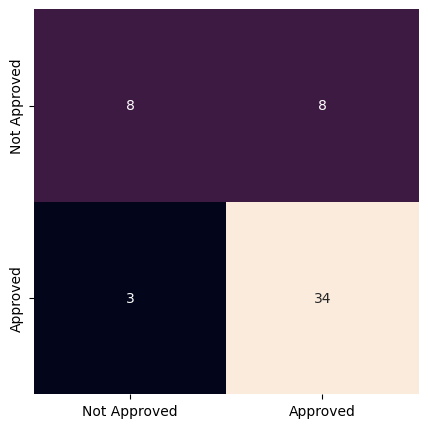


Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.80      0.97      0.88        37

    accuracy                           0.81        53
   macro avg       0.84      0.71      0.73        53
weighted avg       0.82      0.81      0.79        53



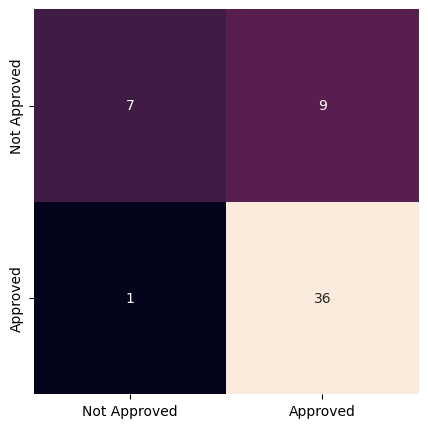


Random Forest

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.82      0.97      0.89        37

    accuracy                           0.83        53
   macro avg       0.85      0.74      0.76        53
weighted avg       0.84      0.83      0.81        53



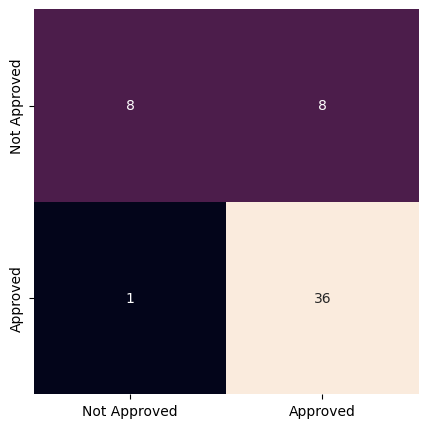

In [106]:
'''Train and Evaluate the Classifiers'''

# Empty list to store the trained model
save_models = []

for model_name, model in classifiers.items():   # For every model in classifiers grab the name and classifier
  X_train = X_train_sc                          # Set X_train to X_train_sc
  X_val = X_val_sc                              # Set X_val to X_val_sc
  model.fit(X_train, y_train)                   # Train the model
  save_models.append(model)                     # Save the model
  y_pred = model.predict(X_val)                 # Make predictions
  evaluation(model_name, y_val, y_pred)         # Call the evaluation function

**Observations:-**       
- The performance of each of the 3 models are approximately very similar.
- Now, we can choose to optimize these models using hyperparameter tuning and see which one yields the best result.
- But before that let's check how the decision tree looks like and if our models are overfitting.

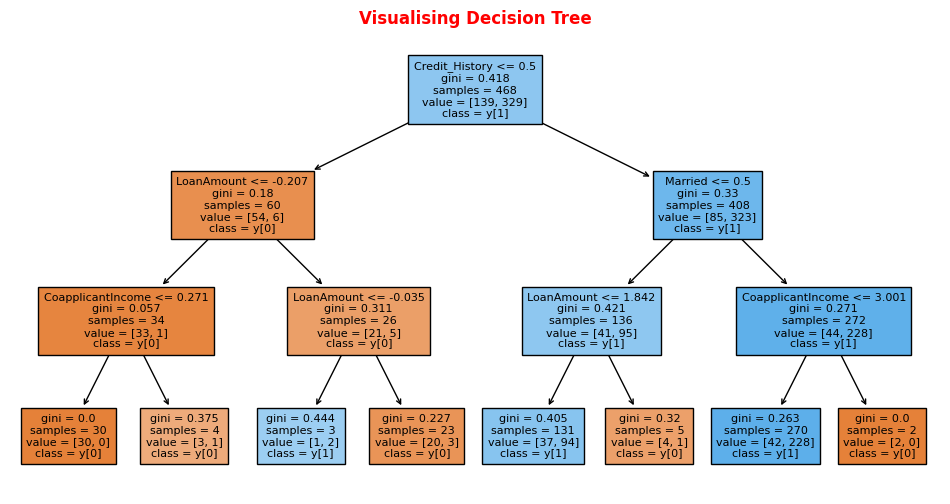

In [107]:
# Check how the decision tree looks like using plot_tree
plt.figure(figsize=(12, 6))               # Size of the figure
plot_tree(save_models[1],                 # DTC
          feature_names=X_train.columns,  # Name of features
          class_names=True,               # Show the class names
          filled=True,                    # Fill the different class with different color
          fontsize=8)                     # Fontsize for better display
plt.title('Visualising Decision Tree',    # Add title
          color='r', weight='bold')       # Customize title
plt.show()

* If you notice, the depth of this decision tree is 3 (strating at root node as 0), this is what we had set in our DTC parameters.
* Notice that we can still add one more depth to this decision tree for a better decision.
* I'll leave that upto you whenever you are practicing, you can play around with this parameter.


## Check if the models are overfitted using the Stratified K-Fold Cross Validation


### Understanding the Stratified K-Fold Cross Validation technique

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width = 55%>


**1) Dataset Preparation:**
- Start with your dataset, which typically consists of features (X) and corresponding target labels (y).
- Ensure that you have a sufficiently large dataset, especially if you are using K-Fold Cross-Validation.

**2) Splitting into Folds:**
- The dataset is divided into K roughly equal-sized, stratified folds.
- The term "stratified" means that each fold preserves the same class distribution as the original dataset.
- This is what we had seen earlier while performing the `train_test_split` with `stratify` argument.

**3) Cross-Validation Loop:**
- The cross-validation process is executed K times.
- Here, each fold serving as the validation (test) set once and the remaining K-1 folds used as the training set.
- In each iteration (fold), one of the K folds is held out as the validation set, and the model is trained on the other K-1 folds.

**4) Training and Testing:**
- For each fold, train the model on the training subset and evaluate its performance on the validation (test) subset.
- Performance metrics such as accuracy, F1-score, etc., are computed for each fold to assess the model's performance.

**5) Aggregating Results:**
- After completing all K iterations (folds), you have K sets of performance metrics, one for each fold.
- You can compute various statistics on these metrics, such as the mean to assess the model's overall performance.



In [108]:
# Import the StratifiedKFold and cross_val_score from sklearn's model_selection
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import cross_val_score as cvs

In [109]:
# Combining the engineered and scaled features also the target features for Cross Validation
X = np.vstack((X_train_sc.values, X_val_sc.values))
y = np.hstack((y_train.values, y_val.values))

In [110]:
# Performing SKFold CV on all the ML models
skfold = skf(n_splits=5, shuffle=False)
scores = {}
for model_name, model in classifiers.items():
  skfold_scores = cvs(model, X, y, cv=skfold, scoring='f1')
  scores[model_name] = skfold_scores
scores

{'Logistic Regression': array([0.84076433, 0.8447205 , 0.86956522, 0.85714286, 0.88607595]),
 'Decision Tree': array([0.82352941, 0.85714286, 0.87116564, 0.8902439 , 0.89440994]),
 'Random Forest': array([0.8375    , 0.86419753, 0.85350318, 0.89570552, 0.88050314])}

In [111]:
# Taking the mean of each cross_val_scores to use it for visualization
for model, skf_score in scores.items():
  scores[model] = np.mean(np.array(skf_score))

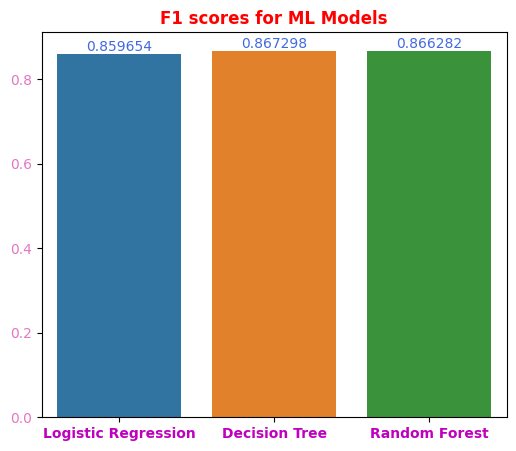

In [112]:
plt.figure(figsize=(6,5))                                              # helps to adjust figure size
ax = sns.barplot(x = list(scores.keys()), y = list(scores.values()))   # plots the bar graph
ax.bar_label(ax.containers[0], color='royalblue')                      # adds the labels on bars
plt.title('F1 scores for ML Models', color ='r', weight ='bold')       # adds the title on figure
plt.xticks(color='m', weight='bold')                                   # customize x ticks
plt.yticks(color='tab:pink')                                           # customize y ticks
plt.show()                                                             # show the figure

**Observations:-**     
- As all the cross validation scores are near to each other, we can safely conclude that our models are not overfitting.
- As all these models are performing very similarly, we can choose to fine tune them and see which one is optimal.



**General Flow for Training and Evaluation:-**
- It is a good practice to train our model with cross validation in the first place.
- Choose K-Fold Cross Validation if there is no imbalance in target feature.
- Choose Stratified K-Fold Cross Validation if the target feature has imbalanced classes.

## Hyperparameter Tuning using GridSearchCV
- We create a grid of different parameter settings.
- Train our model on all the possible combination of these settings.
- `GridSearchCV` gives the best parameter settings on which your model performed the best.
- However, as our dataset is imbalanced, we already realise that the model won't have a lot of improvement (if at all).
- For that we use more advanced sampling techniques to overcome the imbalance first and then train the models.
- For example, Random Oversampling, SMOTE (**S**ynthetic **M**inority **O**versampling **Te**chnique), Random Undersampling, e.t.c.

In [113]:
# Define a random state for reproducibility
random_state = 999

# Define the classifiers with respective parameter grid
classifiers = {
    'Logistic Regression': {
        'classifier': LogisticRegression(random_state=random_state),
        'param_grid': {
            'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10],
            'solver': ['liblinear'],
            'max_iter': [100, 200, 300],
        }
    },
    'Decision Tree Classifier': {
        'classifier': DecisionTreeClassifier(random_state=random_state),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 2, 5, 8, 10],
            'min_samples_split': [2, 3, 5, 10],
            'min_samples_leaf': [1, 2, 3, 4, 10, 20],
        }
    },
    'Random Forest Classifier': {
        'classifier': RandomForestClassifier(random_state=random_state),
        'param_grid': {
            'n_estimators': [30, 50, 100, 150],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 2, 3, 4, 6, 10],
            'min_samples_split': [2, 3, 5, 10],
            'min_samples_leaf': [1, 2, 3, 4, 10, 20],
            'n_jobs' : [-1]
        }
    }
}

In [114]:
# Saving models
save_models_gscv = []

Best hyperparameters for Logistic Regression:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score for Logistic Regression: 0.8767
Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.82      0.97      0.89        37

    accuracy                           0.83        53
   macro avg       0.85      0.74      0.76        53
weighted avg       0.84      0.83      0.81        53



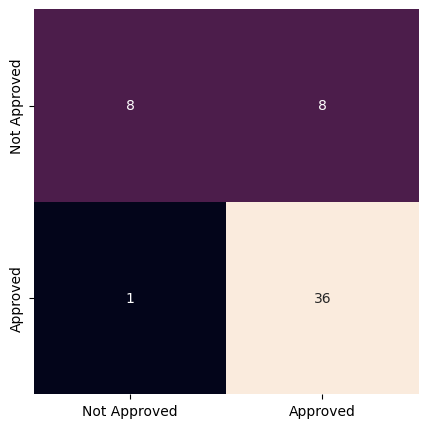


Best hyperparameters for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best F1 score for Decision Tree Classifier: 0.8767
Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.82      0.97      0.89        37

    accuracy                           0.83        53
   macro avg       0.85      0.74      0.76        53
weighted avg       0.84      0.83      0.81        53



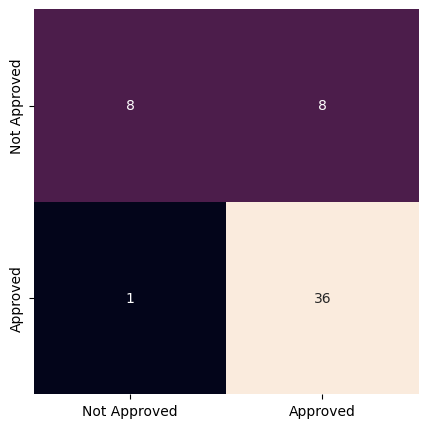


Best hyperparameters for Random Forest Classifier:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1}
Best F1 score for Random Forest Classifier: 0.8770
Random Forest Classifier

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.82      0.97      0.89        37

    accuracy                           0.83        53
   macro avg       0.85      0.74      0.76        53
weighted avg       0.84      0.83      0.81        53



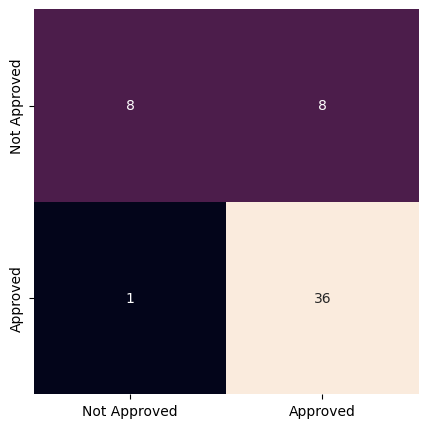


CPU times: user 22.4 s, sys: 2.08 s, total: 24.5 s
Wall time: 16min 26s


In [115]:
# Track the time of this code cell
%%time

from sklearn.model_selection import GridSearchCV
# Define the number of folds for Stratified K-Fold CV
num_folds = 5

# Create a Stratified K-Fold object
stratified_kfold = skf(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through the classifiers
for classifier_name, classifier_info in classifiers.items():
    classifier = classifier_info['classifier']
    param_grid = classifier_info['param_grid']

    # Create a GridSearchCV object with F1 scoring and Stratified K-Fold CV
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring='f1',
        cv=stratified_kfold,
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the GridSearchCV object to your data
    grid_search.fit(X_train_sc, y_train)  # Replace X_train and y_train with your training data

    # Print the best hyperparameters and F1 score
    print(f"Best hyperparameters for {classifier_name}:")
    print(grid_search.best_params_)
    print(f"Best F1 score for {classifier_name}: {grid_search.best_score_:.4f}")

    # Get the best estimator (trained model) and append it to the save_models_gscv
    best_classifier = grid_search.best_estimator_
    save_models_gscv.append(best_classifier)

    # Now, you can use the best_classifier for making predictions or further evaluation
    y_pred = best_classifier.predict(X_val_sc)
    evaluation(classifier_name, y_val, y_pred)

**Observations:-**
- Clearly, there were improvements in Logistic Regression and Decision Tree.
- Whereas, Random Forest already had the best settings in the first attempt, hence no improvements seen.
- You can surely try adding some more parameters with more settings.
- Note that, more the settings, more the combinations of these settings and hence more training time will be required.


## Testing Loan Approval Status Predictor
- Let's use `X_test` to see how our models perform on the unseen labelled data.
- We shall make predictions on each of the trained model and compare them.


In [116]:
X_test_sc = X_test.copy()
X_test_sc[numeric_features] = sc.transform(X_test_sc[numeric_features])

In [117]:
X_test_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
612,1,1,2,1,0,0.504409,-0.61219,0.479924,0.273443,2.0,2
613,0,0,0,1,1,-0.148032,-0.61219,-0.159502,0.273443,0.0,1


In [122]:
print("="*65)

print('''\nChoose from the available models:-
0 - Logistic Regression
1 - Decision Tree Classifier
2 - Random Forest Classifier\n''')
user_input = int(input('Which model would you like to select? (Choose from 0/1/2):- '))

print("\n" + "="*65)

print("\nActual Predictions:- ")
print(y_test.values)

print("\n" + "="*65)

print(f"\nResult of '{list(classifiers.keys())[user_input]}' before fine tuning:- ")
print(save_models[user_input].predict(X_test_sc))

print(f"\nResult of '{list(classifiers.keys())[user_input]}' after fine tuning:- ")
print(save_models_gscv[user_input].predict(X_test_sc))

print("\n" + "="*65)


Choose from the available models:-
0 - Logistic Regression
1 - Decision Tree Classifier
2 - Random Forest Classifier

Which model would you like to select? (Choose from 0/1/2):- 0


Actual Predictions:- 
[1 0]


Result of 'Logistic Regression' before fine tuning:- 
[1 0]

Result of 'Logistic Regression' after fine tuning:- 
[1 0]



**Observations:-**
- Looks like Decision tree is not able to perform
For any more advanced operations, we shall use Logistic regression as it is the best model with least training time.

## Feature Importance
- Imagine that if an applicant whose loan application was rejected is making an inquiry to the bank.
- Applicant wants to know about why was the loan application rejected?
- In such cases, understanding which feature of the applicants are given more importance by the ML model is necessary.



Let's see how we can find this using Random Forest Classifer...

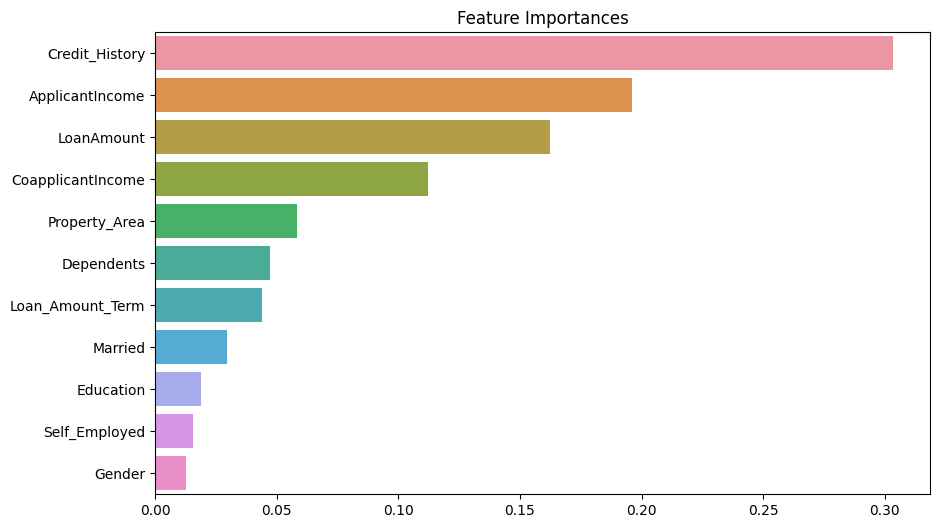

In [119]:
# Grab the feature importance from Random Forest Classifier (also works for Decision Tree Classifier)
fi = save_models[2].feature_importances_
features = list(X_train.columns)

# Create a DataFrame to store feature names and importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': fi})

# Sort the DataFrame by importance in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Create a barplot of sorted feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_sorted, orient="h")
plt.title('Feature Importances')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Observations:-**
- Now, you will be able to answer confidently to the applicant as in why was his loan application rejected.
- You will just have to match the applicant's form with these features according to the importance.
- You can also give them some suggestions through which their application may get approved.


**Example:-**
- If the applicant has a good credit history but less income, very high loan amount, no coapplicant and loan term is 180 days.  
- Then what would you suggest?
- You can give some options like, improve your income or decrease the loan amount or get a coapplicant.
- You can also suggest them to change their loan term to 360 days based on the following analysis.

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

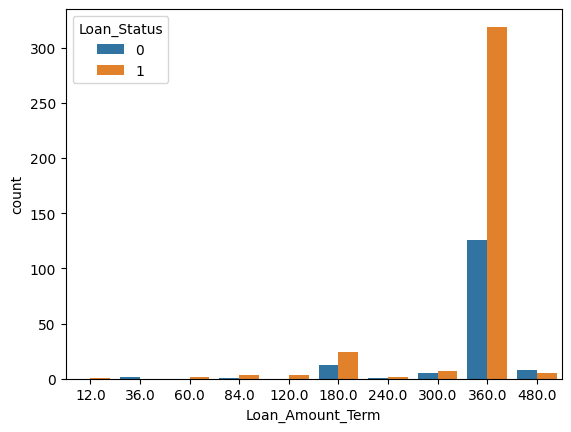

In [120]:
sns.countplot(x=loan_df['Loan_Amount_Term'], hue=loan_df['Loan_Status'])